# AND 연산 (Tensorflow 1.x)

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
def print_n(title, atr):
  print("{}: {}\n{}".format(title, "=" *100 ,atr))

In [ ]:
# 4줄에 2칸
X = np.array([
          [0,0],
          [0,1],
          [1,0],
          [1,1]
], dtype = "float32")

# 4줄에 1칸
y = np.array([
              [0],
              [0],
              [0],
              [1]
], dtype="float32")

# weight
# 2줄 1칸
w = tf.Variable([[1], [2]], dtype = "float32")


# bias
b = tf.Variable([3],  dtype = "float32")

print_n("X",X)
print_n("y",y)
print_n("w",w)
print_n("b",b)

In [ ]:
# 행렬 연산
print("tf.matul: {}\n{}".format("=" *50 ,tf.matmul(X , w) + b))

print("sigmoid한 값:{}\n{}.".format("="*50,tf.sigmoid( tf.matmul(X , w) + b )))

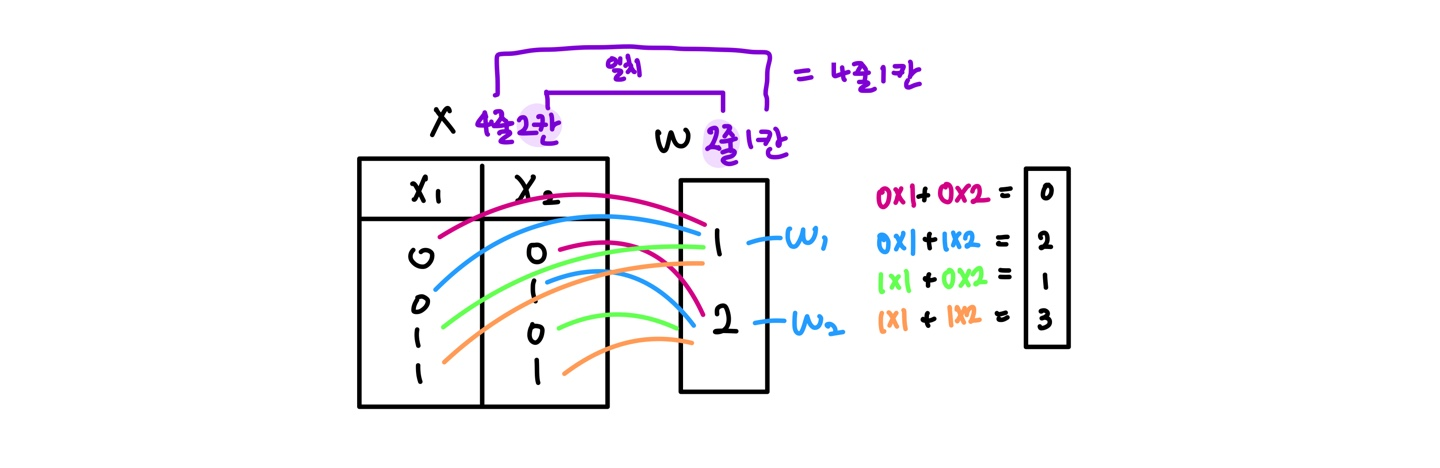

In [ ]:
hypothesis =  tf.sigmoid(tf.matmul(X, w) + b)
print(hypothesis)

tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)


In [ ]:
# Adam 계산법 사용 , 러닝레이트 0.1
optimizer = tf.train.AdamOptimizer(0.1)


In [ ]:
# Adam 계산법 사용 , 러닝레이트 0.1
optimizer = tf.train.AdamOptimizer(0.1)

for step in range(1000):
    with tf.GradientTape() as tape: 
      print("step =", step)

      # 예측값
      hypothesis =  tf.sigmoid(tf.matmul(X, w) + b)
      print("hypothesis = ", hypothesis)

      # 오차
      cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
      print("cost = ",cost)

      # weight , bias 편미분
      grads = tape.gradient(cost, [w,b])
      print("기울기", grads)

      # weight, bias 업데이트
      optimizer.apply_gradients(grads_and_vars = zip(grads, [w , b]))

      print("w =",w)
      print("b =",b)
      print("="*100)

In [ ]:
predict = tf.sigmoid( tf.matmul(X , w) + b )

# 조건 맞으면 1, 아니면 0
predict1 = tf.cast(predict > 0.5 , dtype="float32")

# 정확도 계산
accurary = tf.reduce_mean(tf.cast(tf.equal(predict1, y), dtype="float32"))
print("accurary =", accurary.numpy())

accurary = 1.0


In [ ]:
tf.cast(predict > 0.5 , dtype="float32")

<tf.Tensor: id=67151, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [ ]:
predict

<tf.Tensor: id=67140, shape=(4, 1), dtype=float32, numpy=
array([[8.8366251e-06],
       [1.9183367e-02],
       [1.9092433e-02],
       [9.7731417e-01]], dtype=float32)>

# AND 연산 (Tensorflow 2.x)

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
X = np.array( [
               [0, 0],
               [0, 1],
               [1, 0],
               [1, 1]

], dtype = "float32")

y = np.array([
              [0],
              [0],
              [0],
              [1]
])

In [ ]:
model = Sequential()

model.add(Dense(1, input_dim = 2, activation = 'sigmoid'))

model.summary() # Param 3 : w1, w2 ,b

model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.1), metrics=["acc"])

model.fit(X , y , epochs = 100)

In [ ]:
model.layers[0].get_weights()

[array([[3.5833385],
        [3.5916975]], dtype=float32), array([-5.4826856], dtype=float32)]

# 실습

## 인공 신경망을 이용한 AND 연산(Tensorflow 1.x)
- 107 ~ 120

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
def print_n(title, atr):
  print("{}: {}\n{}".format(title, "=" *100 ,atr))

In [ ]:
# 4줄에 2칸
X = np.array([
          [0,0],
          [0,1],
          [1,0],
          [1,1]
], dtype = "float32")

# 4줄에 1칸
y = np.array([
              [0],
              [0],
              [0],
              [1]
], dtype="float32")

# weight
# 2줄 1칸
w = tf.Variable([[1], [2]], dtype = "float32")


# bias
b = tf.Variable([3],  dtype = "float32")

print_n("X",X)
print_n("y",y)
print_n("w",w)
print_n("b",b)

In [ ]:
# 손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라짐
# 많은 방법중 Adam 사용 , learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(0.01)


for step in range(5000):
  with tf.GradientTape() as tape:

    # 예측
    hypothesis = tf.sigmoid(tf.matmul(X, w) + b)

    # 오차
    cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))

    # cost가 작아지도록 w,b을 계속 계산해서 가지고있음 
    grads = tape.gradient(cost, [w,b])
    
  optimizer.apply_gradients(grads_and_vars = zip(grads, [w, b]))

  if step % 100 == 0:
    print("=" *50)
    print("step : {}, cost : {}, w : {}, b : {}".format(step, cost.numpy(), w.numpy(), b.numpy()))
    print("grads",grads)
    print("=" * 50)
# print(grads)

In [ ]:
# 새로운 w,b로 예측
predict = tf.sigmoid(tf.matmul(X, w) + b)
print_n("predict",predict)

# 임계값 설정
predict_cast = tf.cast(predict >0.5, dtype = tf.float32)
print_n("predict_cast",predict_cast)

# 정확도 계산
accuracy =  tf.reduce_mean(tf.cast(tf.equal(predict_cast ,y), dtype =tf.float32))
print_n("accuracy", accuracy)

In [ ]:
# 0, 1 and연산 테스트
arr = np.array([[0,1]], dtype = "float32")

# 예측
predict = tf.sigmoid(tf.matmul(arr, w) + b)

# 출력
print_n("0 and 1 predict",predict.numpy())

0 and 1 predict: ====================================================================================================
[[0.02666336]]


In [ ]:
# gradienttape
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)
print(loss)

tf.Tensor(11.1662035, shape=(), dtype=float32)


## 인공 신경망을 이용한 AND연산 (Tensorflow 2.x)
- 121 ~ 131

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 4줄에 2칸
X = np.array([
          [0,0],
          [0,1],
          [1,0],
          [1,1]
], dtype = "float32")

# 4줄에 1칸
y = np.array( [0,0,0,1], dtype="int32")


In [ ]:
model = Sequential()

model.add(Dense(1, input_dim = 2, activation='sigmoid'))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.1), metrics = ['acc'])

model.fit(X, y, epochs = 100)

In [ ]:
# 예측
pred = model.predict(X)
print(pred)

# 임계값  0.5 이상이면 1, 작으면 0
predict01 = np.where(pred >0.5 ,1 ,0)
print("="*10)
print("predict01:\n",predict01)

# 1차원 배열로 변환
predict02 = predict01.flatten()
print(predict02)

# 정답과 비교
predict03 = (predict02 == y)
print("predict03:\n",predict03)

# 정확도 계산
acc = np.sum(predict03)/4
print(acc)




[[0.00098924]
 [0.07362996]
 [0.07932841]
 [0.8736749 ]]
predict01:
 [[0]
 [0]
 [0]
 [1]]
[0 0 0 1]
predict03:
 [ True  True  True  True]
1.0
